Objective is to code a solution to the dimensionless form of the linear diffusion equation using the implicit Finite Difference Scheme and compare the results with analytical solution. Boundary condition is constant flux applied.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erfc
from scipy.sparse import csc_array
from scipy.sparse.linalg import factorized

In [ ]:
def solve_ana_diffusion_flux(x, t, q, D):
    u = (2*q)/D * (np.sqrt(D*t/np.pi) * np.exp(-x**2/(4*D*t)) - x/2 * erfc(x/np.sqrt(4*D*t)))
    return u 

def solve_fdm_dimless_diffusion_flux(Nx, Nt, T_hat):
	x_hat = np.linspace(0, 1, Nx)
	dx_hat = 1 / Nx
	dt_hat = T_hat / Nt    
	gamma = dt_hat / dx_hat ** 2

	main = (1+2*gamma)*np.ones(Nx)
	upper = -gamma*np.ones(Nx-1)
	lower = -gamma*np.ones(Nx-1)
	A = diags([lower, main, upper], [-1, 0, 1]).toarray() # type: ignore
	A[0, 1] = -2*gamma
	A[Nx-1, Nx-2] = -2*gamma
	
	solve = factorized(csc_array(A))
	u_hat = np.zeros((Nt, Nx))
	for k in range(Nt-1):
		u_hat[k, 0] = u_hat[k, 0] + 2*gamma*dx_hat
		u_hat[k+1, :] = solve(u_hat[k, :])

	return x_hat, u_hat

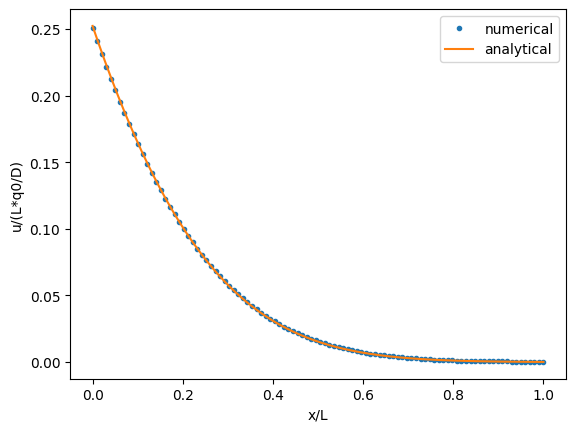

In [34]:
Nx = 100
Nt = 100
L = 10
D = 0.1
q0 = 1e-1
T = 50
T_hat = D * T / (L ** 2)

x_hat, u_hat = solve_fdm_dimless_diffusion_flux(Nx, Nt, T_hat)
x_ana = np.linspace(0, L, 1000)
u_ana = solve_ana_diffusion_flux(x_ana, T, q0, D)

plt.figure()
plt.plot(x_hat, u_hat[-1, :], '.', label='numerical')

plt.plot(x_ana/L, u_ana*D/L/q0, label='analytical')
plt.xlabel('x/L')
plt.ylabel('u/(L*q0/D)')
plt.legend()
plt.show()

  (0, 0)	3.0
  (1, 0)	-1.0
  (0, 1)	-2.0
  (1, 1)	3.0
  (2, 1)	-1.0
  (1, 2)	-1.0
  (2, 2)	3.0
  (3, 2)	-2.0
  (2, 3)	-1.0
  (3, 3)	3.0
